# Home Wrok: Neural Network
## Prediction with Keras
---

***Attention : there are three models in this file with the last one being the best and chosen one.***

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.regularizers import l2

2024-10-09 17:24:45.460041: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-09 17:24:43.808150: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
data = pd.read_csv('../Data/data.csv') 
data.head(8)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,3,9085,1,1,134.0,1,37,38,...,0,5,8,5,12.600000,0,9.4,-0.8,-3.12,Enrolled
1,1,17,2,9254,1,1,128.0,1,38,38,...,0,6,7,5,14.600000,0,11.1,0.6,2.02,Graduate
2,1,1,1,9070,1,1,125.0,1,1,1,...,0,6,11,4,10.833333,0,13.9,-0.3,0.79,Enrolled
3,1,7,2,9085,1,3,130.0,1,3,3,...,0,4,10,0,0.000000,4,10.8,1.4,1.74,Dropout
4,1,1,2,9500,1,1,135.0,1,37,1,...,0,8,12,7,11.721429,0,12.7,3.7,-1.70,Graduate
5,1,39,1,9500,1,19,133.1,1,37,38,...,0,7,14,3,12.525000,0,12.4,0.5,1.79,Enrolled
6,1,39,1,33,1,1,140.0,1,3,1,...,0,7,12,5,13.800000,3,16.2,0.3,-0.92,Enrolled
7,1,1,2,9773,1,1,138.0,1,19,1,...,0,6,6,6,13.666667,0,12.7,3.7,-1.70,Graduate


In [3]:
# checking for missing values.
missing_values = data.isnull().sum()
print(missing_values)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

There are no missing values in the data set.

Assuming the last column is our target, we seperate features (x) and targets (y).

In [4]:
# extracting features and targets
y = data["Target"]
X = data.drop("Target", axis=1).values

In [5]:
print(len(set(y))) # getting unique target values

3


As the ouput of the cell above shows, the final prediction can have **3** different values. Therefore, our model needs to have 3 output neurons.

In [6]:
X.shape

(3924, 36)

Our data has **3924** instances and **36** features.

In [7]:
# seperating validation set from training set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=100)

In [8]:
# encoding target values to numerical values
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train) 
y_valid_encoded = encoder.transform(y_valid)

In [9]:
# scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

- **Encoding the target**: Changes the cetegorical target to numerical values. This encoding is necessary for the model to work properly.

- **Scaling the features**: The features are scaled to have a mean of 0 and a standard deviation of 1. This is done to make the model more robust and to make the training process faster.

## Model 1

- **First layer**: 64 neurons, ReLU activation function and batch normalization. Input shape matches the number of features.

- **Second layer**: 32 neurons, ReLU activation function and batch normalization.

- **Output layer**: 3 neurons, softmax activation function.

- **Optimizer**: Adam optimizer with a learning rate of 0.001.

- **Loss function**: Sparse categorical crossentropy.

- **Metrics**: Accuracy

- **Batch size**: 32

- **Epochs**: 50

In [10]:
model1 = Sequential()

model1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1], )))
model1.add(BatchNormalization())

model1.add(Dense(32, activation='relu'))
model1.add(BatchNormalization())

model1.add(Dense(3, activation='softmax'))

2024-10-09 17:24:48.590986: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-09 17:24:48.770112: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-09 17:24:48.770207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-09 17:24:48.771293: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable

In [11]:
# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
loss_fn = "sparse_categorical_crossentropy"

model1.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

In [12]:
history_model1 = model1.fit(X_train, y_train_encoded,
                            batch_size=32,
                            epochs=50,  
                            verbose=1,
                            validation_data=(X_valid, y_valid_encoded),
                            )

Epoch 1/50
15/99 [===>..........................] - ETA: 0s - loss: 1.4420 - accuracy: 0.3750

2024-10-09 17:25:11.180618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


99/99 [==============================] - 2s 11ms/step - loss: 0.9169 - accuracy: 0.6021 - val_loss: 0.7554 - val_accuracy: 0.6955
Epoch 2/50
99/99 [==============================] - 1s 9ms/step - loss: 0.6612 - accuracy: 0.7216 - val_loss: 0.6967 - val_accuracy: 0.7045
Epoch 3/50
99/99 [==============================] - 1s 8ms/step - loss: 0.6100 - accuracy: 0.7509 - val_loss: 0.6680 - val_accuracy: 0.7248
Epoch 4/50
99/99 [==============================] - 1s 8ms/step - loss: 0.5937 - accuracy: 0.7572 - val_loss: 0.6667 - val_accuracy: 0.7236
Epoch 5/50
99/99 [==============================] - 1s 7ms/step - loss: 0.5694 - accuracy: 0.7697 - val_loss: 0.6470 - val_accuracy: 0.7299
Epoch 6/50
99/99 [==============================] - -1s -15256us/step - loss: 0.5429 - accuracy: 0.7831 - val_loss: 0.6528 - val_accuracy: 0.7338
Epoch 7/50
99/99 [==============================] - 1s 9ms/step - loss: 0.5333 - accuracy: 0.7831 - val_loss: 0.6406 - val_accuracy: 0.7376
Epoch 8/50
99/99 [======

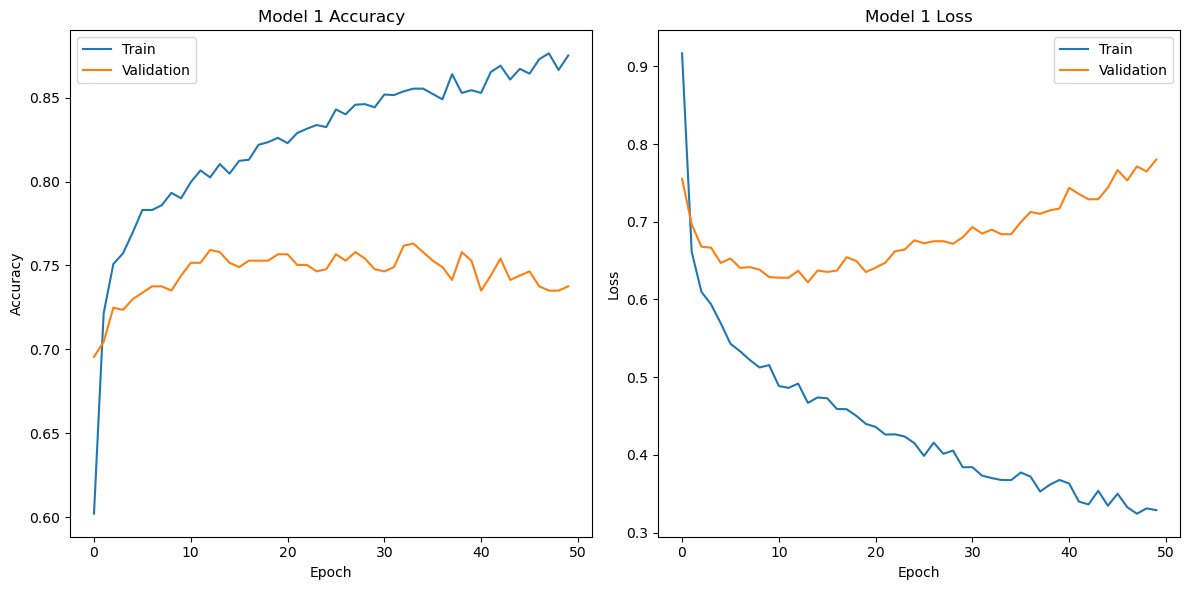

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_model1.history["accuracy"])
plt.plot(history_model1.history["val_accuracy"])
plt.title("Model 1 Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_model1.history["loss"])
plt.plot(history_model1.history["val_loss"])
plt.title("Model 1 Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")

plt.tight_layout()
plt.show()

As we can see from figures above our mode1 has been overfitted. It also doesn't have a good accuracy, let's try to improve it bt adding early stopping and dropout.

## Model 2

- **First layer**: 64 neurons, ReLU activation function and batch normalization. Input shape matches the number of features. Uses l2 regularization and dropout.

- **Second layer**: 32 neurons, ReLU activation function and batch normalization. Uses l2 regularization and dropout.

- **Output layer**: 3 neurons, softmax activation function.

- **Optimizer**: Adam optimizer with a learning rate of 0.0005.

- **Loss function**: Sparse categorical crossentropy.

- **Metrics**: Accuracy

- **Early stopping**: Monitors the validation loss with a patience of 5 epochs.

- **Batch size**: 32

- **Epochs**: 50

In [14]:
model2 = Sequential()

model2.add(Dense(64, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(0.01)))  # Add L2 regularization
model2.add(BatchNormalization())
model2.add(Dropout(0.5))  # Add dropout with a 50% rate to prevent overfitting

model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01))) 
model2.add(BatchNormalization())
model2.add(Dropout(0.5))  # Another dropout layer

model2.add(Dense(3, activation='softmax'))

In [15]:
optimizer = Adam(learning_rate=0.0005)
loss_fn = "sparse_categorical_crossentropy"

model2.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [16]:
history_model2 = model2.fit(X_train, y_train_encoded,
                            batch_size=32,
                            epochs=50,
                            verbose=1,
                            validation_data=(X_valid, y_valid_encoded),
                            callbacks=[early_stopping])

Epoch 1/50
99/99 [==============================] - 2s 11ms/step - loss: 2.3471 - accuracy: 0.4339 - val_loss: 1.6977 - val_accuracy: 0.6433
Epoch 2/50
99/99 [==============================] - 1s 10ms/step - loss: 1.9856 - accuracy: 0.5371 - val_loss: 1.5840 - val_accuracy: 0.6790
Epoch 3/50
99/99 [==============================] - 1s 10ms/step - loss: 1.8084 - accuracy: 0.5903 - val_loss: 1.4998 - val_accuracy: 0.6981
Epoch 4/50
99/99 [==============================] - 1s 10ms/step - loss: 1.6750 - accuracy: 0.6285 - val_loss: 1.4425 - val_accuracy: 0.7083
Epoch 5/50
99/99 [==============================] - 1s 9ms/step - loss: 1.5932 - accuracy: 0.6438 - val_loss: 1.3884 - val_accuracy: 0.7299
Epoch 6/50
99/99 [==============================] - 1s 7ms/step - loss: 1.5063 - accuracy: 0.6588 - val_loss: 1.3419 - val_accuracy: 0.7376
Epoch 7/50
99/99 [==============================] - 1s 6ms/step - loss: 1.4419 - accuracy: 0.6709 - val_loss: 1.2988 - val_accuracy: 0.7401
Epoch 8/50
99/99

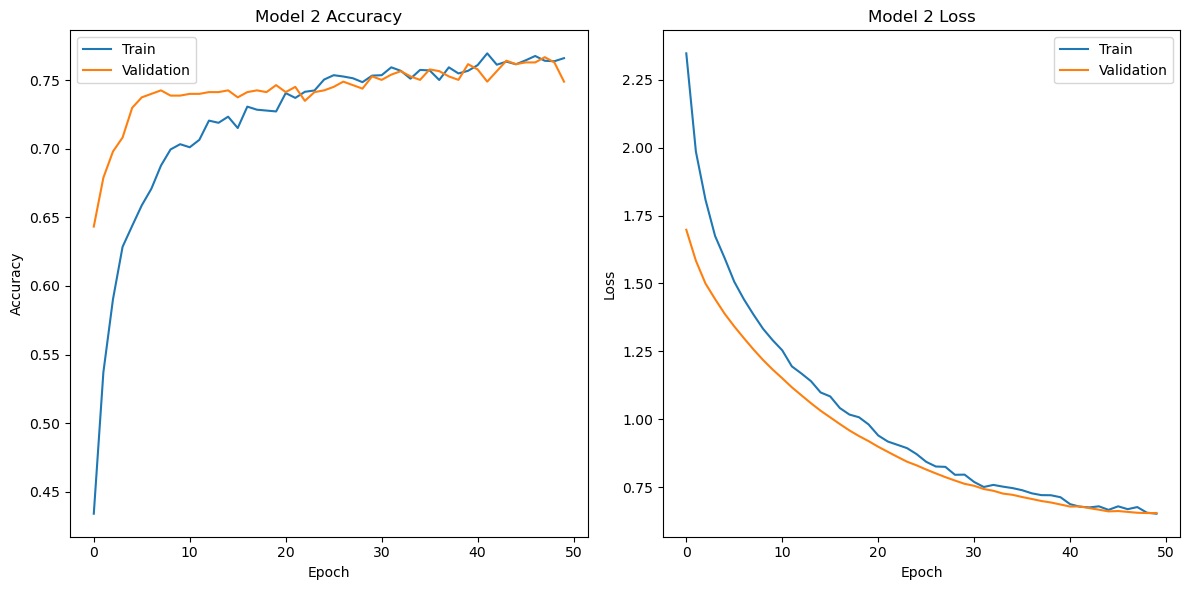

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_model2.history["accuracy"])
plt.plot(history_model2.history["val_accuracy"])
plt.title("Model 2 Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_model2.history["loss"])
plt.plot(history_model2.history["val_loss"])
plt.title("Model 2 Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")

plt.tight_layout()
plt.show()

The model is now more robust and has a better accuracy without being overfitted. Let's try to improve it even more by adding more layers.

## Model 3

- **First layer**: 128 neurons, ReLU activation function and batch normalization. Input shape matches the number of features. Uses l2 regularization and dropout.

- **Second layer**: 64 neurons, ReLU activation function and batch normalization. Uses l2 regularization and dropout.

- **Third layer**: 32 neurons, ReLU activation function and batch normalization. Uses l2 regularization and dropout.

- **Output layer**: 3 neurons, softmax activation function.

- **Optimizer**: Adam optimizer with a learning rate of 0.0005

- **Loss function**: Sparse categorical crossentropy

- **Metrics**: Accuracy

- **Early stopping**: Monitors the validation loss with a patience of 5 epochs

- **Batch size**: 32

- **Epochs**: 100

In [18]:
model3 = Sequential()

# First layer
model3.add(Dense(128, activation='relu', input_shape=(36,), kernel_regularizer=l2(0.001)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

# Second layer
model3.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

# Third layer
model3.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

# Output layer
model3.add(Dense(3, activation='softmax'))

In [19]:
optimizer = Adam(learning_rate=0.0005)
loss_fn = "sparse_categorical_crossentropy"

model3.compile(optimizer=optimizer, loss=loss_fn, metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [20]:
history_model3 = model3.fit(X_train, y_train_encoded,
                            batch_size=32,
                            epochs=100,  # Increased epochs for better training
                            verbose=1,
                            validation_data=(X_valid, y_valid_encoded),
                            callbacks=early_stopping)

Epoch 1/100
99/99 [==============================] - 2s 12ms/step - loss: 1.9652 - accuracy: 0.3820 - val_loss: 1.1217 - val_accuracy: 0.5924
Epoch 2/100
99/99 [==============================] - 1s 9ms/step - loss: 1.4547 - accuracy: 0.5091 - val_loss: 0.9989 - val_accuracy: 0.6815
Epoch 3/100
99/99 [==============================] - 1s 8ms/step - loss: 1.3442 - accuracy: 0.5422 - val_loss: 0.9306 - val_accuracy: 0.7185
Epoch 4/100
99/99 [==============================] - 1s 8ms/step - loss: 1.2288 - accuracy: 0.5798 - val_loss: 0.9012 - val_accuracy: 0.7299
Epoch 5/100
99/99 [==============================] - 1s 8ms/step - loss: 1.1095 - accuracy: 0.6282 - val_loss: 0.8830 - val_accuracy: 0.7261
Epoch 6/100
99/99 [==============================] - 1s 8ms/step - loss: 1.0539 - accuracy: 0.6502 - val_loss: 0.8724 - val_accuracy: 0.7223
Epoch 7/100
99/99 [==============================] - 1s 9ms/step - loss: 1.0502 - accuracy: 0.6518 - val_loss: 0.8631 - val_accuracy: 0.7223
Epoch 8/100


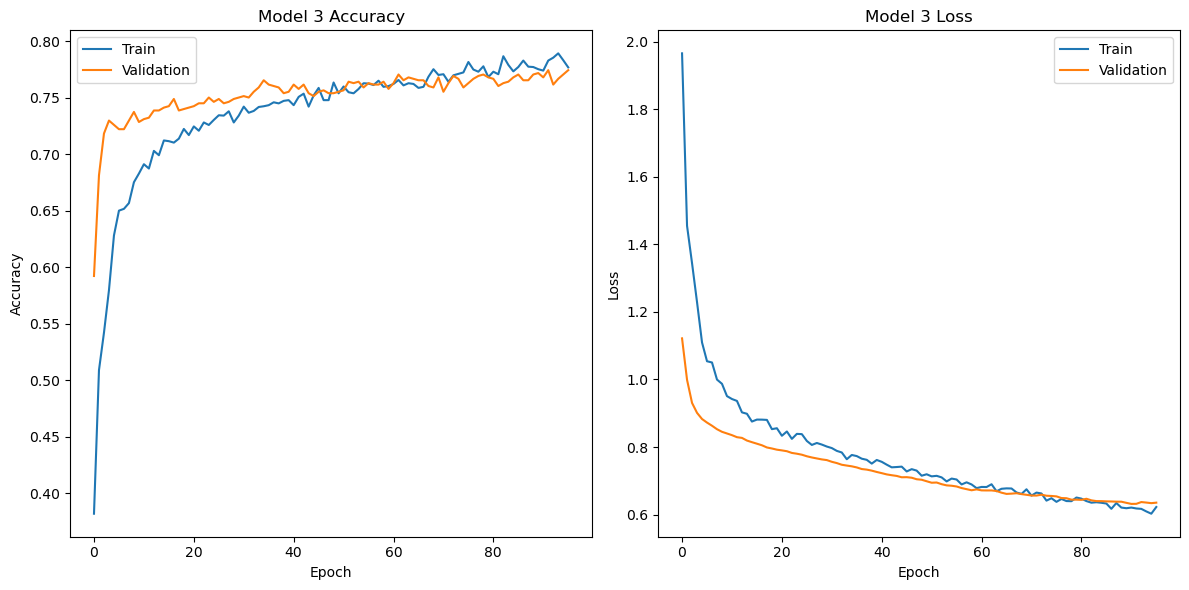

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_model3.history["accuracy"])
plt.plot(history_model3.history["val_accuracy"])
plt.title("Model 3 Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_model3.history["loss"])
plt.plot(history_model3.history["val_loss"])
plt.title("Model 3 Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")

plt.tight_layout()
plt.show()

By adding more layers, the model has improved even more. The accuracy is now **0.77** and the model is not overfitted.